In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')

import matplotlib.cm as cm
import os
import jsm_prephalo
import jsm_stats
import galhalo
import jsm_halopull
import scipy.stats


In [2]:
new = jsm_prephalo.MassMat("../../data/perfect-MW-analog/surv_mass_10k.npy")
new.prep_data(includenan=False)

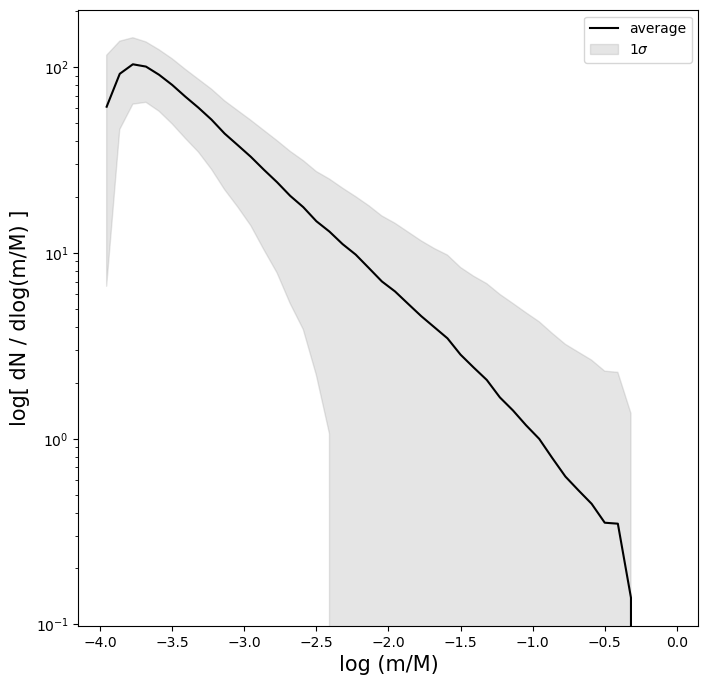

In [3]:
new.SHMF()
new.plot_SHMF()


In [4]:
Ntrees = np.array([100,1000,5000,10000])
Ntrees.shape[0]
index = np.arange(new.lgMh.shape[0])

lgMs = galhalo.SHMR_2D(new.lgMh)

In [5]:
Pnsat = []
MsMax = []
ecdf_MsMax = []

for i, val in enumerate(Ntrees):
    ind = np.random.choice(index, size=val)
    stat = jsm_stats.SatStats(lgMs[ind])
    stat.Nsat(6.5)
    stat.Maxmass()

    Pnsat.append(stat.Pnsat)
    MsMax.append(stat.Msmax)
    ecdf_MsMax.append(stat.ecdf_MsMax)

In [6]:
Ntree_pnsat = np.array(Pnsat)
Ntree_pnsat.shape

(4, 169)

In [7]:
MsMax[-1].shape

(10000,)

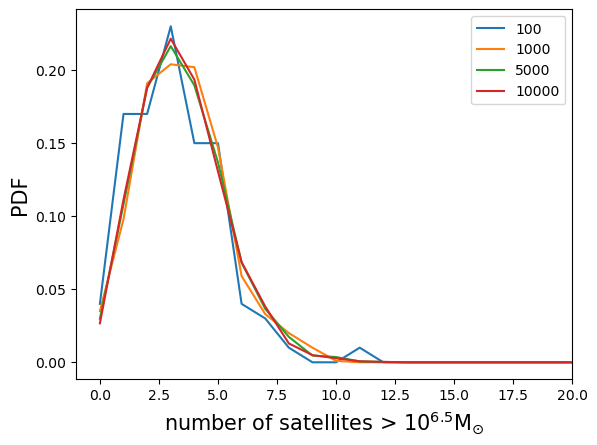

In [8]:
for i, val in enumerate(Ntree_pnsat):
    plt.plot(np.arange(val.shape[0]), val, label=Ntrees[i])
plt.xlabel("number of satellites > $10^{"+str(6.5)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(-1,20)
plt.legend()
plt.show()

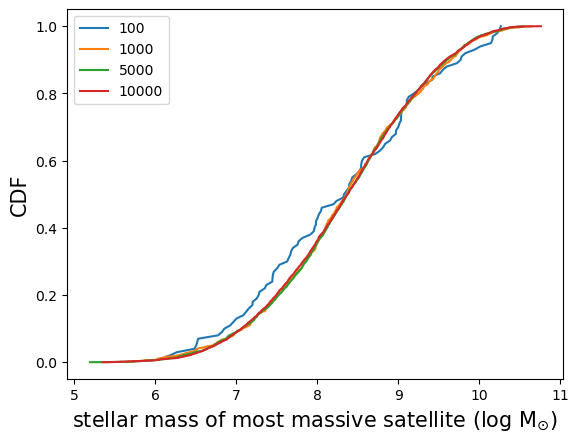

In [9]:
for i, val in enumerate(Ntrees):
    plt.plot(MsMax[i], ecdf_MsMax[i], label=val)
plt.xlabel("stellar mass of most massive satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.legend()
plt.show()